In [46]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score

In [3]:
raw_data_path = "../df/raw/exams.csv"
df = pd.read_csv(raw_data_path)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [4]:
df.info

<bound method DataFrame.info of      gender race/ethnicity parental level of education         lunch  \
0      male        group A                 high school      standard   
1    female        group D            some high school  free/reduced   
2      male        group E                some college  free/reduced   
3      male        group B                 high school      standard   
4      male        group E          associate's degree      standard   
..      ...            ...                         ...           ...   
995    male        group C                 high school      standard   
996    male        group D          associate's degree  free/reduced   
997  female        group C            some high school  free/reduced   
998  female        group C                some college      standard   
999    male        group A                some college      standard   

    test preparation course  math score  reading score  writing score  
0                 completed    

In [5]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000
std,15.402871,14.737272,15.600985
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.500000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [8]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [13]:
for column in df.columns:
    print(f"{column}: {np.unique(df[column])}")

gender: ['female' 'male']
race/ethnicity: ['group A' 'group B' 'group C' 'group D' 'group E']
parental level of education: ["associate's degree" "bachelor's degree" 'high school' "master's degree"
 'some college' 'some high school']
lunch: ['free/reduced' 'standard']
test preparation course: ['completed' 'none']
math score: [ 13  23  25  26  28  29  30  31  32  33  34  35  36  37  38  39  40  41
  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59
  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
  96  97  98  99 100]
reading score: [ 27  28  29  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100]
writing score: [ 23  24  26  27  28  30  31  32

In [16]:
need_proccessing_columns = [
    "gender",
    "race/ethnicity",
    "parental level of education",
    "lunch",
    "test preparation course",
]
for column in need_proccessing_columns:
    list_uniq_column = np.unique(df[column])
    df[column].replace(list_uniq_column, [*range(len(list_uniq_column))], inplace=True)

In [17]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,0,2,1,0,67,67,63
1,0,3,5,0,1,40,59,55
2,1,4,4,0,1,59,60,50
3,1,1,2,1,1,77,78,68
4,1,4,0,1,0,78,73,68


In [18]:
df.describe()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.517000,2.161000,2.56900,0.652000,0.665000,66.396000,69.002000,67.738000
std,0.499961,1.132414,1.81122,0.476574,0.472227,15.402871,14.737272,15.600985
min,0.000000,0.000000,0.00000,0.000000,0.000000,13.000000,27.000000,23.000000
25%,0.000000,1.000000,1.00000,0.000000,0.000000,56.000000,60.000000,58.000000
50%,1.000000,2.000000,2.00000,1.000000,1.000000,66.500000,70.000000,68.000000
75%,1.000000,3.000000,4.00000,1.000000,1.000000,77.000000,79.000000,79.000000
max,1.000000,4.000000,5.00000,1.000000,1.000000,100.000000,100.000000,100.000000


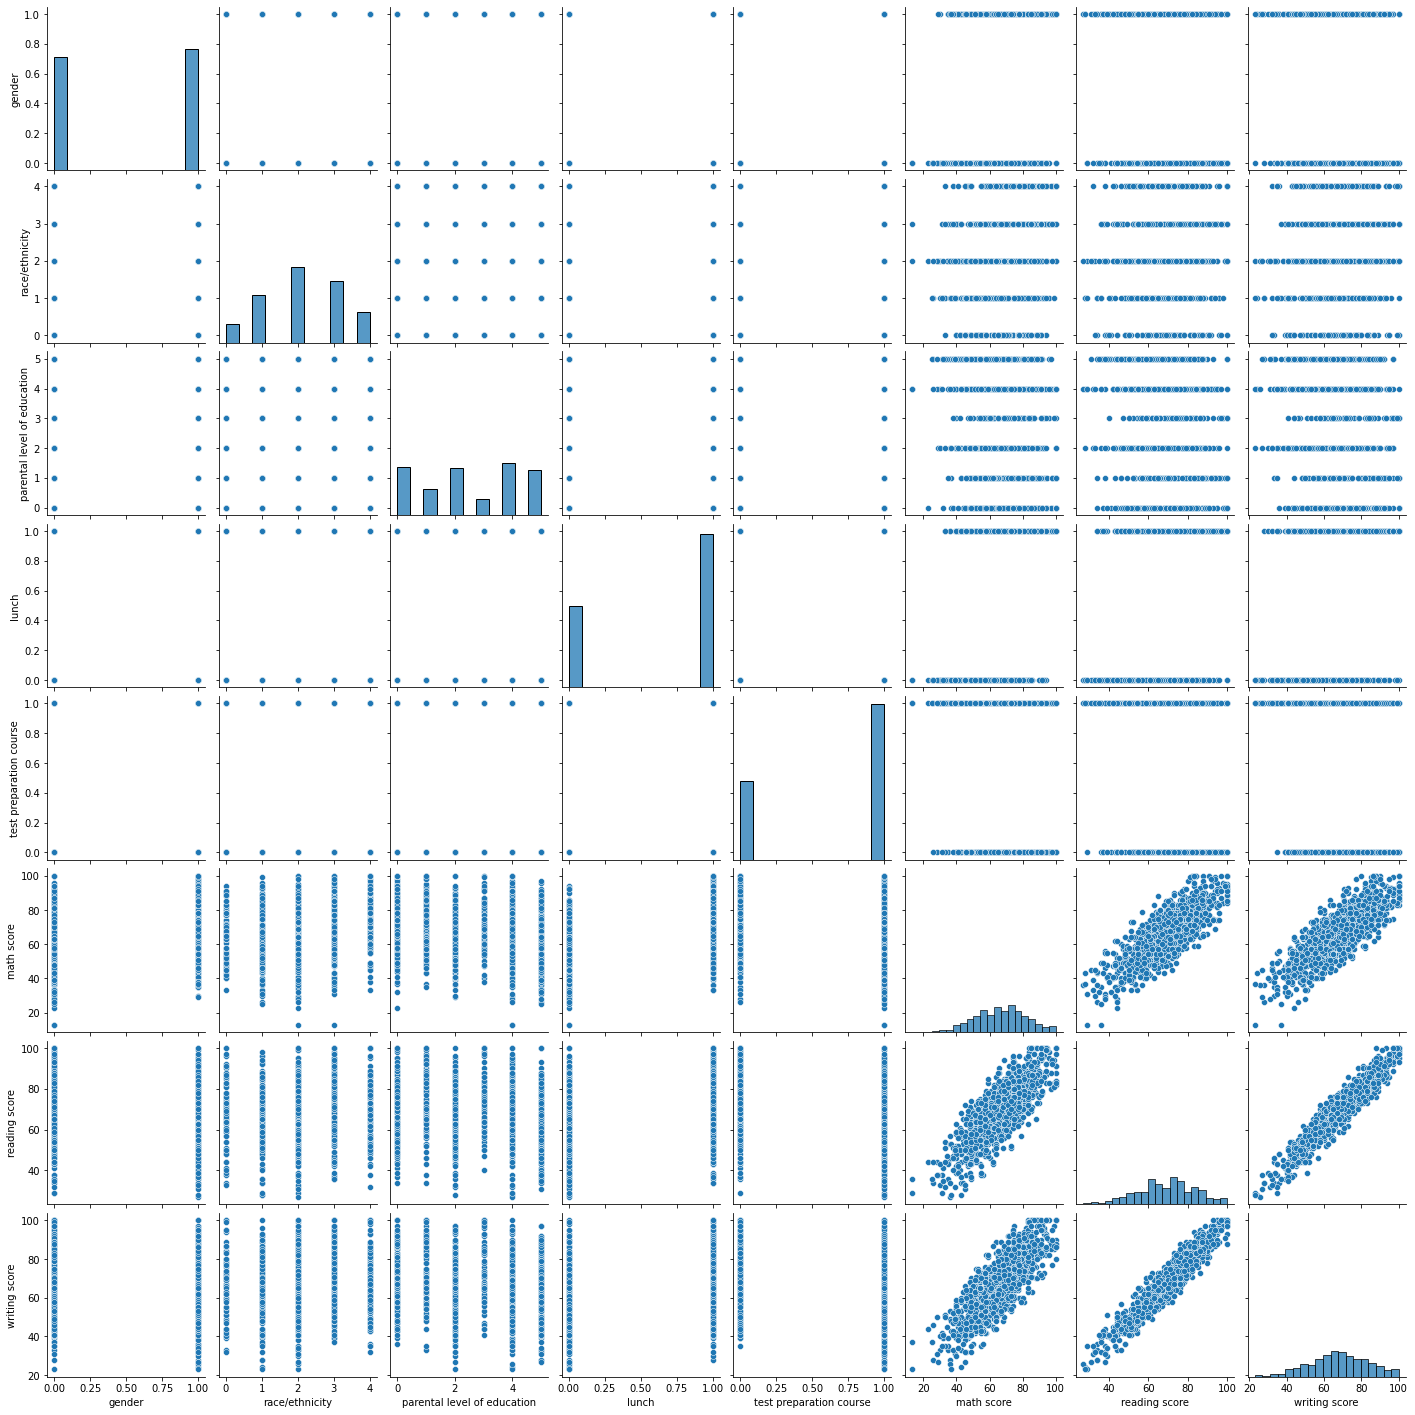

In [19]:
sns.pairplot(df)

<AxesSubplot:>

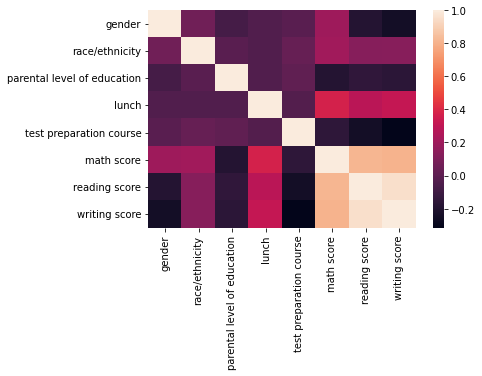

In [20]:
sns.heatmap(df.corr())

In [21]:
df['total_scores'] = df['math score'] + df['reading score'] + df['writing score']
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_scores
0,1,0,2,1,0,67,67,63,197
1,0,3,5,0,1,40,59,55,154
2,1,4,4,0,1,59,60,50,169
3,1,1,2,1,1,77,78,68,223
4,1,4,0,1,0,78,73,68,219


In [27]:
print(f"min: {df['total_scores'].min()}")
print(f"max: {df['total_scores'].max()}")
print(df['total_scores'].describe())

min: 65
max: 300
count    1000.000000
mean      203.136000
std        43.542732
min        65.000000
25%       175.750000
50%       202.000000
75%       235.000000
max       300.000000
Name: total_scores, dtype: float64


/Users/romansim/Проекты/Технопарк/ML-разработчик/2 семестр/Машинное обучение в продакшен/homeworks/venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='total_scores'>

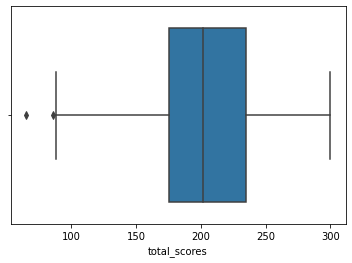

In [28]:
sns.boxplot(df["total_scores"])

In [35]:
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

In [36]:
X

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,0,2,1,0,67,67,63
1,0,3,5,0,1,40,59,55
2,1,4,4,0,1,59,60,50
3,1,1,2,1,1,77,78,68
4,1,4,0,1,0,78,73,68
...,...,...,...,...,...,...,...,...
995,1,2,2,1,1,73,70,65
996,1,3,0,0,0,85,91,92
997,0,2,5,0,1,32,35,41
998,0,2,4,1,1,73,74,82


In [37]:
y

0      197
1      154
2      169
3      223
4      219
      ... 
995    208
996    268
997    108
998    229
999    187
Name: total_scores, Length: 1000, dtype: int64

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [41]:
X_train

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
105,0,3,1,1,1,70,78,82
68,1,1,2,1,1,79,64,60
479,1,2,0,0,1,62,43,45
399,0,0,4,0,0,53,70,69
434,1,2,0,1,1,67,63,66
...,...,...,...,...,...,...,...,...
835,0,1,5,1,1,76,81,79
192,1,4,5,0,1,68,62,61
629,1,2,2,1,1,72,59,54
559,1,4,2,0,1,56,48,36


In [42]:
ridge = Ridge(alpha=1.0)

In [43]:
ridge.fit(X_train, y_train)

Ridge()

In [44]:
y_pred = ridge.predict(X_test)

In [48]:
y_pred

array([170.00010149, 237.00001857, 177.00005177, 198.99994479,
       126.00012632, 159.00009282, 199.00006146, 225.99988532,
       190.00004483, 288.99981016,  88.0002121 , 218.9999993 ,
       234.99998293, 232.99999008, 210.00000766, 178.00014812,
       236.99992606, 166.00003817, 252.99993872, 243.99983015,
       224.99979822, 238.99982707, 211.99998651, 146.00017672,
       227.99991062, 183.00009206, 157.00015078, 200.00004165,
       195.99992308, 154.00006882, 201.00002257, 179.00007908,
       195.00005874, 226.99984758, 144.00013493, 265.99990676,
       179.00001888, 176.00002983, 206.99995743, 220.00002915,
       242.99991151, 267.99982509, 252.99989561, 227.9998753 ,
       222.9998741 , 186.00008995, 201.99991129, 224.99986555,
       189.00014019, 262.99980859, 248.99986502, 245.99986673,
       170.00008719, 206.99994114, 247.99994828, 196.00016427,
       210.00002542, 213.99995775, 229.99992119, 246.99987424,
       208.99996021, 189.00006948, 255.99990093, 210.99

In [49]:
print("Score on Test Data : ",ridge.score(X_test,y_test))
print("Score on Training Data : ",ridge.score(X_train,y_train))

Score on Test Data :  0.9999999999921425
Score on Training Data :  0.9999999999934769
